# Aula 04 - Regressão Linear Simples

A regressão linear refere-se a uma técnica estatística utilizada para modelar a relação entre uma ou mais variáveis independentes (também chamadas de características ou features) e uma variável dependente, geralmente contínua. A regressão linear tenta encontrar a melhor linha reta que representa a relação entre as variáveis independentes e dependentes, minimizando a soma dos quadrados das diferenças entre os valores observados e os valores previstos pela linha.

Não é uma aplicação muito utilizada na prática, mas é uma boa aplicação para começar a entender o que é Machine Learning e para esquentar os motores para futuras técnicas de regressão.

A primeira coisa que o professor fez na aula foi organizar alterar os códigos das aulas anteriores para se tornarem funções.

In [1]:
import numpy as np
import pandas as pd

def loadDataSet(filename):
    print("Carregando a base de dados...")
    baseDeDados = pd.read_csv(filename, delimiter=';')
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values
    print("ok!")
    return X, y

def fillMissingData(X):
    print("Preenchendo dados que estão faltando...")
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,1:] = imputer.fit_transform(X[:,1:])
    print("ok!")
    return X

def computeCategorization(X):
    print("Computando rotulação...")
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
    # Dummy-Encoding
    D = pd.get_dummies(X[:,0])
    X = X[:,1:]
    X = np.insert(X, 0, D.values, axis=1)
    print("ok!")
    return X

def splitTrainTestSets(X, y, testSize):
    print("Separando conjuntos de teste e treino...")
    from sklearn.model_selection import train_test_split
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)
    print("ok!")
    return XTrain, XTest, yTrain, yTest

def computeNormalization(XTrain, XTest):
    print("Computando Normalização...")
    from sklearn.preprocessing import StandardScaler
    scaleX = StandardScaler()
    XTrain = scaleX.fit_transform(XTrain)
    XTest = scaleX.fit_transform(XTest)
    print("ok!")
    return XTrain, XTest

Agora que já temos todas as funções das aulas passadas definidas, vamos criar uma função que realize uma regressão linear:

In [2]:
def computeLinearRegression(XTrain, yTrain, XTest, yTest):
    # Faz a regressão
    from sklearn.linear_model import LinearRegression
    print("Computando Regressão Linear...")
    regressor = LinearRegression()
    regressor.fit(XTrain, yTrain)
    yPred = regressor.predict(XTest)
    print("ok!")
    
    # Plota a regressão
    import matplotlib.pyplot as plt
    plt.scatter(XTest[:,-1], yTest, color = 'red')
    plt.plot(XTest[:,-1], regressor.predict(XTest), color='blue')
    plt.title("Inscritos x Visualizações")
    plt.xlabel("Inscritos")
    plt.ylabel("Visualizações")
    plt.show()

**Comentando o código:**

IMPORTANDO PACOTES:
- **import matplotlib.pyplot as plt** Importa a biblioteca matplotlib, uma das bibliotecas mais populares para visualização de dados em Python, especialmente para criação de gráficos e plots.

- **from sklearn.linear_model import LinearRegression** Importa a classe **LinearRegression** do pacote **linear_model** (modelos lineares) da biblioteca **sklearn**. Esta classe é utilizada para realizar regressão linear em conjuntos de dados.

CRIANDO A REGRESSÃO:
- **regressor = LinearRegression()** Cria uma instância da classe LinearRegression, um objeto chamado regressor, que será usado para ajustar o modelo aos dados de treino e realizar previsões.

- **regressor.fit(XTrain, yTrain)** Ajusta o modelo de regressão linear aos dados de treino.Este método calcula os coeficientes do modelo de regressão linear que melhor se ajustam aos dados de treino.

- **yPred = regressor.predict(XTest)** Usa o modelo ajustado para fazer previsões sobre os dados de teste. O método predict calcula os valores previstos da variável dependente com base nos valores de XTest, utilizando os coeficientes calculados durante o ajuste do modelo.

IMPRIMINDO O GRÁFICO

- Todos os códigos que começam com **plt** utilizam a biblioteca matplotlib para criar e configurar um gráfico para mostrar o resultado da nossa regressão.

Uma vez a função de regressão definida, vamos criar uma função que chama as funções anteriores na oredem certa para gerar uma regressão. Vamos botar 20% para treino e 80% para teste.

In [3]:
def runLinearRegressionExample():
    X, y = loadDataSet("svbr.csv")
    X = fillMissingData(X)
    X = computeCategorization(X)
    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.8)
    computeLinearRegression(XTrain, yTrain, XTest, yTest)

Chamando a função:

Carregando a base de dados...
ok!
Preenchendo dados que estão faltando...
ok!
Computando rotulação...
ok!
Separando conjuntos de teste e treino...
ok!
Computando Regressão Linear...
ok!


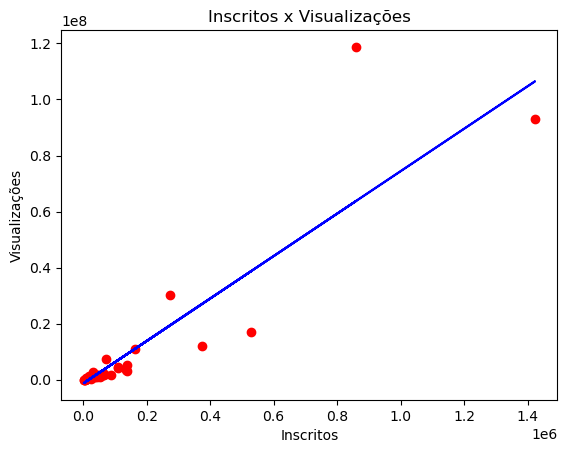

In [4]:
runLinearRegressionExample()

Basicamente o que a regressão linear acima está tentando prever é quantas visualizações um canal vai ter, sabendo o seu número de inscritos.

In [5]:
pag = pd.read_csv("svbr.csv", delimiter=';')
pd.DataFrame(pag)

,Canal,Inscritos,Visualizações
0,Site Arqueologia Egípcia,13438.0,406590
1,Terra Negra,35241.0,868235
2,Frank Jaava,31680.0,2856508
3,Dispersciência,25100.0,150000
4,Olá Ciência,32788.0,1575456
5,A matemaníaca por Julia Jaccoud,65453.0,1667892
6,Delta T - Os super lentos,12000.0,171361
7,Bláblálogia,161951.0,11027386
8,Efarsas,78876.0,6226235
9,Minuto da Terra,274196.0,30166457
